In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ardi_data = pd.read_csv("Cleaned_1_data.csv")

ardi_data

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,ConditionType,Category,Cause_of_Death,Data_Value_Alt,Effect,ConsumptionPattern,Sex,AgeGroup
0,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),10.0,Harmful Effects,Excessive Alcohol Use,Overall,65+
1,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),54.0,Harmful Effects,Excessive Alcohol Use,Overall,50-64
2,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),82.0,Harmful Effects,Excessive Alcohol Use,Overall,35-49
3,2015,2019,AL,Alabama,ARDI,Acute,Motor Vehicle Traffic Crashes,Motor vehicle traffic crashes,115.0,Harmful Effects,Excessive Alcohol Use,Overall,20-34
4,2015,2019,AL,Alabama,ARDI,Acute,Motor Vehicle Traffic Crashes,Motor vehicle traffic crashes,23.0,Harmful Effects,Excessive Alcohol Use,Overall,0-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcohol abuse,12.0,Harmful Effects,Any Alcohol Use,Overall,50-64
4123,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,14.0,Harmful Effects,Any Alcohol Use,Overall,65+
4124,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,24.0,Harmful Effects,Any Alcohol Use,Overall,35-49
4125,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,43.0,Harmful Effects,Any Alcohol Use,Overall,50-64


In [3]:
unique_cat = ardi_data['Cause_of_Death'].unique()
print(unique_cat)

['Poisoning (not alcohol)' 'Motor vehicle traffic crashes' 'Fall injuries'
 'Fire injuries' 'Homicide' 'Suicide' 'Alcohol abuse'
 'Alcohol dependence syndrome' 'Alcoholic liver disease'
 'Cancer, breast (females only)' 'Cancer, colorectal' 'Cancer, liver'
 'Cancer, oral cavity and pharyngeal' 'Coronary heart disease'
 'Hypertension' 'Stroke, hemorrhagic' 'Stroke, ischemic'
 'Liver cirrhosis, unspecified' 'Cancer, esophageal' 'Atrial fibrillation'
 'Alcohol poisoning' 'Alcoholic psychosis' 'Cancer, prostate (males only)'
 'Aspiration' 'Drowning' 'Alcohol cardiomyopathy'
 'Alcohol-induced acute pancreatitis'
 'Degeneration of nervous system due to alcohol' 'Cancer, laryngeal'
 'Cancer, pancreatic' 'Cancer, stomach' 'Pneumonia'
 'Unprovoked seizures, epilepsy, or seizure disorder'
 'Pancreatitis, acute' 'Hypothermia' 'Child maltreatment']


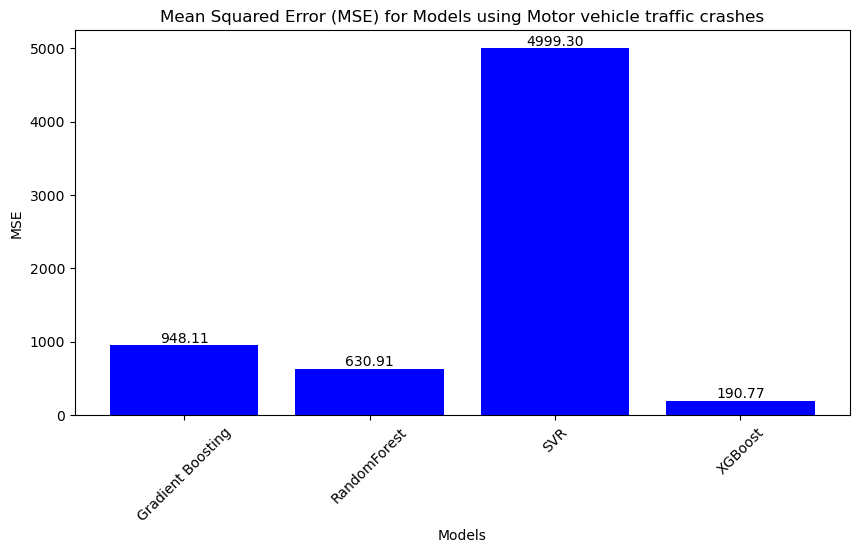

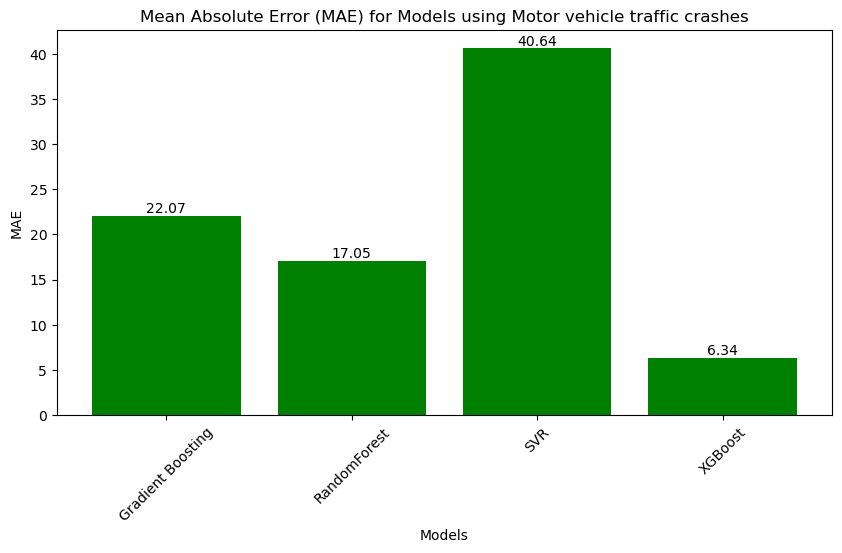

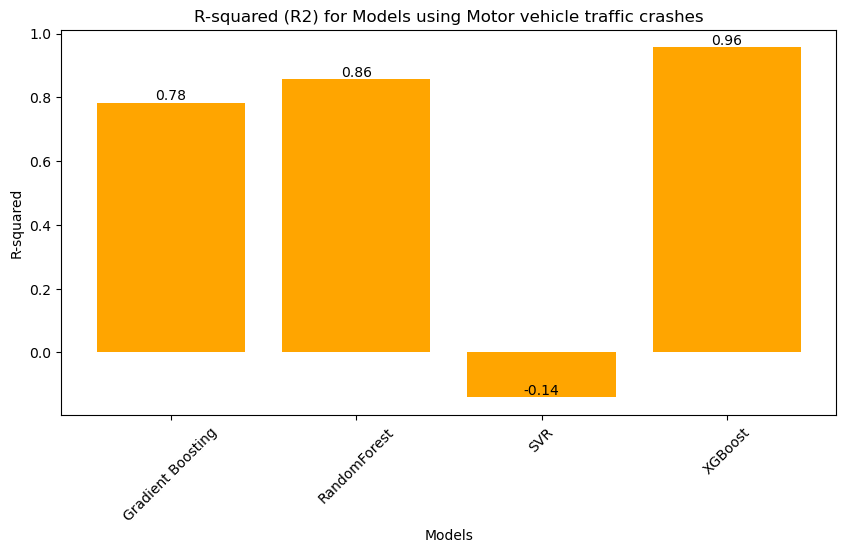

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def predict_with_models(ardi_data, cause_of_death_value):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'AgeGroup', 'Category']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by cause_of_death value
    filtered_data = ardi_data[ardi_data['Cause_of_Death'] == cause_of_death_value]
    
    # Check if there are enough samples for training and testing
    if len(filtered_data) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    # Split data into features and target
    X = filtered_data[['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'AgeGroup', 'Category']]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Gradient Boosting': GradientBoostingRegressor(),
        'RandomForest': RandomForestRegressor(),
        'SVR': SVR(kernel='linear'),
        'XGBoost': XGBRegressor()
    }

    # Make predictions and evaluate each model
    mse_results = {}
    mae_results = {}
    r2_results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_results[model_name] = mse
        mae_results[model_name] = mae
        r2_results[model_name] = r2

    # Plot MSE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mse_results.keys(), mse_results.values(), color='blue')
    plt.title(f'Mean Squared Error (MSE) for Models using {cause_of_death_value}')
    plt.xlabel('Models')
    plt.ylabel('MSE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mse in zip(bars, mse_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot MAE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mae_results.keys(), mae_results.values(), color='green')
    plt.title(f'Mean Absolute Error (MAE) for Models using {cause_of_death_value}')
    plt.xlabel('Models')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mae in zip(bars, mae_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot R-squared for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(r2_results.keys(), r2_results.values(), color='orange')
    plt.title(f'R-squared (R2) for Models using {cause_of_death_value}')
    plt.xlabel('Models')
    plt.ylabel('R-squared')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, r2 in zip(bars, r2_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

    plt.show()

# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the cause_of_death value for filtering
cause_of_death_value = 'Motor vehicle traffic crashes'

# Perform prediction with models for the specified cause_of_death value
predict_with_models(ardi_data, cause_of_death_value)


In [4]:
# Cause_of_Death based 1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# # Load the dataset from ardi_data
# df = pd.read_csv('ardi_data.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Category']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on Cause_of_Death using SVR
def predict_by_Cause_of_Death_svr(category):
    df_filtered = ardi_data[ardi_data['Cause_of_Death'] == Cause_of_Death]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Category']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = SVR(kernel='linear')  # Using a linear kernel for SVR
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
#     model = SVR(kernel='rbf')  # Using RBF kernel for SVR
#     model.fit(X_train, y_train)

#     # Make predictions
#     y_pred = model.predict(X_test)
    
    svr_mse = mean_squared_error(y_test, y_pred)
    svr_mae = mean_absolute_error(y_test, y_pred)
    svr_r2 = r2_score(y_test, y_pred)
    
    return y_pred, svr_mse, svr_mae, svr_r2

# Example prediction using SVR based on Cause_of_Death
Cause_of_Death = 'Motor vehicle traffic crashes'

prediction, svr_mse, svr_mae, svr_r2 = predict_by_Cause_of_Death_svr(Cause_of_Death)
print(f"SVR Predicted values for '{Cause_of_Death}':", prediction)
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R2):", svr_r2)


SVR Predicted values for 'Motor vehicle traffic crashes': [35.03211811 36.64058076 35.45092145 37.46784675 35.45419618 37.30118696
 38.27822259 34.61331476 36.14008488 34.3715119  34.24897311 34.58608392
 36.8584275  34.22174227 34.46681986 34.86873305 35.07296437 37.85941924
 33.83016977 34.50766612 35.48142702 37.08661494 34.8415022  34.67105118
 35.37250365 34.62693019 35.04900826 34.60297407 37.52230843 34.11609362
 37.38287949 37.03215325 34.18417073 37.16830747 34.33066564 34.41235817
 36.50770127 36.41239332 34.48043528 36.85515277 34.02078567 33.68040013
 34.21140157 37.06265883 34.23535769 34.01751094 34.07197263 37.48146217
 37.4406159  34.15366516 34.94008488 35.38284434 36.53165738 34.43631428
 37.81529825 37.10350509 36.80396582 35.02177741 36.24900826 37.73688045
 36.56216296 35.10019521 38.16929921 34.06163194 34.46354513 36.9809663
 35.14104148 35.50865786 36.65747091 36.96407615 33.81655435 34.11281889
 37.00819714 37.95145247 38.2237609  34.91285404]
Mean Squared Erro

In [5]:
# Cause_of_Death based 2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# # Load the dataset from ardi_data
# df = pd.read_csv('ardi_data.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Category']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on Cause_of_Death using Gradient Boosting
def predict_by_Cause_of_Death_gb(age_group):
    df_filtered = ardi_data[ardi_data['Cause_of_Death'] == Cause_of_Death]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Category']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = GradientBoostingRegressor()  # Using Gradient Boosting for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    gb_mse = mean_squared_error(y_test, y_pred)
    gb_mae = mean_absolute_error(y_test, y_pred)
    gb_r2 = r2_score(y_test, y_pred)
    
    return y_pred, gb_mse, gb_mae, gb_r2

# Example prediction using Gradient Boosting based on Cause_of_Death
Cause_of_Death = 'Motor vehicle traffic crashes'

prediction, gb_mse, gb_mae, gb_r2 = predict_by_Cause_of_Death_gb(Cause_of_Death)
print(f"Gradient Boosting Predicted values for '{Cause_of_Death}':", prediction)
print("Mean Squared Error (MSE):", gb_mse)
print("Mean Absolute Error (MAE):", gb_mae)
print("R-squared (R2):", gb_r2)


Gradient Boosting Predicted values for 'Motor vehicle traffic crashes': [ 66.43569395  72.85053068  35.71751025 314.7093799  294.94746032
  44.01431517  -1.05421291  67.76600044  23.29742262  71.70660831
  64.95838275  61.20225203  74.29615909 110.06693242  62.21682913
  44.01431517  83.93715427  47.02277962   8.66139946  54.4586598
  64.15391658  85.26746075  40.73534935  55.77582246 105.80782589
  49.63899624  78.03476053 104.20481276  81.83354949  34.21891995
  50.76104244  61.20225203 -23.01988296  29.95020546  74.87751715
  71.70660831  30.07676726  10.27742634  81.55389877  45.17510061
  12.86697712  20.18716686   4.20799308 103.4005984  108.47899519
  57.65593584  62.44446452  78.03476053  51.16467546  89.35393924
  29.48212628  35.290454    93.13962738  28.93162161  35.290454
  55.77582246  71.70660831  53.36481658  33.27797669  34.17806602
 127.50843023  35.83995339  22.45637559  20.1247168   53.14012019
 262.22927278  25.80830962  63.18575715  14.07659183  53.4145693
  33.277

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Category'] # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on Cause_of_Death using XGBoost
def predict_by_Cause_of_Death_xgb(age_group):
    df_filtered = ardi_data[ardi_data['Cause_of_Death'] == Cause_of_Death]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Category']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = XGBRegressor()  # Using XGBoost for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    xgboost_mse = mean_squared_error(y_test, y_pred)
    xgboost_mae = mean_absolute_error(y_test, y_pred)
    xgboost_r2 = r2_score(y_test, y_pred)
    
    return y_pred, xgboost_mse, xgboost_mae, xgboost_r2

# Example prediction using XGBoost based on Cause_of_Death
Cause_of_Death = 'Motor vehicle traffic crashes'

prediction, xgboost_mse, xgboost_mae, xgboost_r2 = predict_by_Cause_of_Death_xgb(Cause_of_Death)
print(f"XGBoost Predicted values for '{Cause_of_Death}':", prediction)
print("Mean Squared Error (MSE):", xgboost_mse)
print("Mean Absolute Error (MAE):", xgboost_mae)
print("R-squared (R2):", xgboost_r2)


XGBoost Predicted values for 'Motor vehicle traffic crashes': [ 85.94247    53.865078   36.275417  309.97095   298.14233    43.701813
  12.807729  104.93736    20.889864   74.29764    60.426994   41.71815
  99.316536  143.3341     38.054955   43.553493   83.047806   25.856754
   9.78809    25.903727   76.91699    84.858665   48.846313   59.216694
  99.6795     10.577172   44.263374   73.79919    78.411255   21.747904
   3.167029   51.15638     9.646011   16.668707  100.9139     22.503742
  25.382824   10.298595   85.42977    45.66435    10.645322   15.319598
  14.515453   51.113205  109.204414   27.03044    24.967394   44.48608
  30.806955  136.93379    11.27343    44.2545    100.84357    20.3827
  44.00582    52.34009    73.98767    48.520798   27.45259    22.588345
  67.231415   37.87198    21.31799    15.391894   66.71327   367.4196
  13.014504   74.18806    21.32092     3.5582602  25.278717   29.373337
  22.60973    17.888512   38.05004   105.95133  ]
Mean Squared Error (MSE): 190.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Category']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on Cause_of_Death using Random Forest
def predict_by_Cause_of_Death_rf(age_group):
    df_filtered = ardi_data[ardi_data['Cause_of_Death'] == Cause_of_Death]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Category']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor()  # Using RandomForestRegressor for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rf_mse = mean_squared_error(y_test, y_pred)
    rf_mae = mean_absolute_error(y_test, y_pred)
    rf_r2 = r2_score(y_test, y_pred)
    
    return y_pred, rf_mse, rf_mae, rf_r2

# Example prediction using Random Forest based on Cause_of_Death
Cause_of_Death = 'Motor vehicle traffic crashes'

prediction, rf_mse, rf_mae, rf_r2 = predict_by_Cause_of_Death_rf(Cause_of_Death)
print(f"Random Forest Predicted values for '{Cause_of_Death}':", prediction)
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)


Random Forest Predicted values for 'Motor vehicle traffic crashes': [ 82.88  66.49  30.71 341.59 267.52  45.76  18.6  101.23  28.4   71.44
  54.15  44.55  75.94 148.86  51.08  43.81  84.62  27.67  19.49  29.65
  71.23  94.34  38.81  42.13  99.36  38.15  56.98  93.08  60.9   68.99
  28.72  55.5   41.06  18.49  92.36  63.3   31.48  14.11  82.55  38.13
  14.51  28.65  26.19  63.02 125.15  37.58  67.63  54.26  31.14 104.79
  22.78  44.23  89.65  29.43  44.21  42.19  69.01  48.5   28.35  24.25
 134.24  36.99  24.98  18.82  58.89 316.62  13.3   65.37  38.57  28.51
  27.12  37.17  46.61  16.97  62.81  98.26]
Mean Squared Error (MSE): 576.2358026315788
Mean Absolute Error (MAE): 16.402105263157893
R-squared (R2): 0.8684969652474118


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables

label_encoders = {}
categorical_columns =['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Category']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on Cause_of_Death using Linear Regression
def predict_by_Cause_of_Death_linear(age_group):
    df_filtered = ardi_data[ardi_data['Cause_of_Death'] == Cause_of_Death]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Category']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()  # Using Linear Regression for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    linear_mse = mean_squared_error(y_test, y_pred)
    linear_mae = mean_absolute_error(y_test, y_pred)
    linear_r2 = r2_score(y_test, y_pred)
    
    return y_pred, linear_mse, linear_mae, linear_r2

# Example prediction using Linear Regression based on Cause_of_Death
Cause_of_Death = 'Motor vehicle traffic crashes'

prediction, linear_mse, linear_mae, linear_r2 = predict_by_Cause_of_Death_linear(Cause_of_Death)
print(f"Linear Regression Predicted values for '{Cause_of_Death}':", prediction)
print("Mean Squared Error (MSE):", linear_mse)
print("Mean Absolute Error (MAE):", linear_mae)
print("R-squared (R2):", linear_r2)


Linear Regression Predicted values for 'Motor vehicle traffic crashes': [58.14187379 69.85188058 52.00511564 66.1635461  60.67191159 56.51738067
 53.72680154 64.27863195 75.498954   71.4763737  70.7418466  64.11540371
 71.15770654 70.57861835 72.04767256 57.16250432 58.38671616 59.8635597
 76.87860476 72.29251493 60.83513984 63.87835067 56.99927608 73.2718844
 60.18222686 64.36024607 66.89028387 72.86381379 66.49000259 78.59250133
 57.00706541 63.55189418 79.00057194 64.3680354  71.23153134 71.72121607
 77.70253531 77.13123645 72.12928668 62.49091058 78.02120247 75.98084941
 79.16380019 72.38191838 70.66023248 69.35440652 69.68086301 66.24516022
 66.00031785 70.17054774 66.23737089 51.59704502 69.1989676  63.21764836
 50.95192137 72.62676075 70.83125005 66.72705563 76.15186698 59.12903259
 78.0289918  58.54994441 53.07388856 78.26604484 63.3808766  71.89223364
 58.79478678 60.99836808 78.60029066 63.14382356 76.79699063 69.92570537
 72.05546189 51.7680626  53.40034505 66.07414265]
Mean

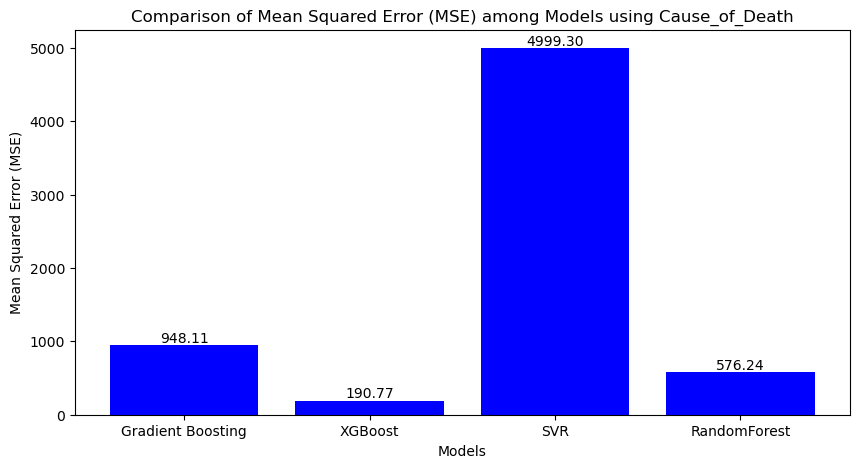

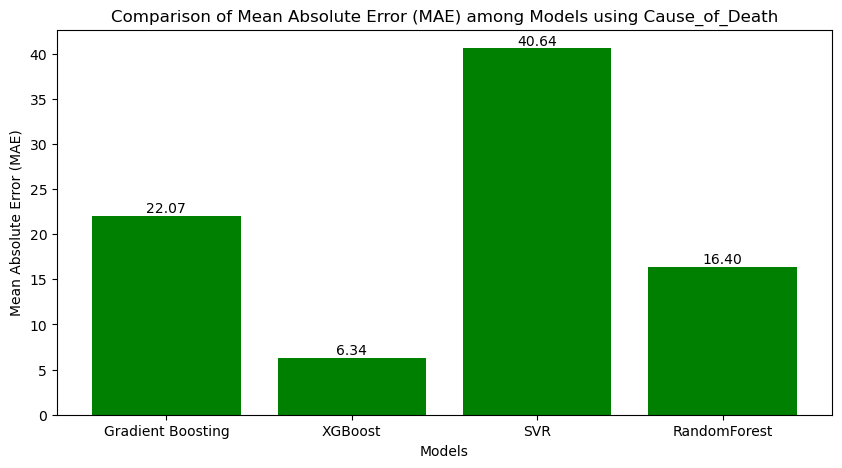

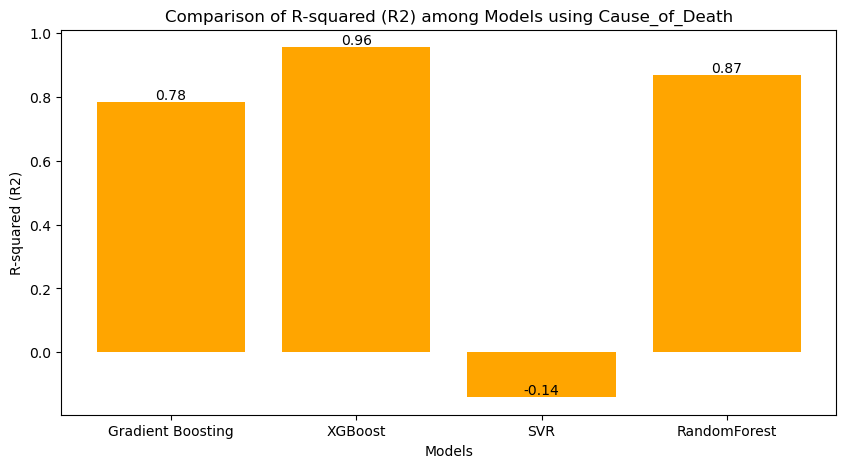

In [9]:
import matplotlib.pyplot as plt

# Create a list of model names and their respective metrics
models = ['Gradient Boosting', 'XGBoost', 'SVR', 'RandomForest']
mse_scores = [gb_mse, xgboost_mse, svr_mse, rf_mse]
mae_scores = [gb_mae, xgboost_mae, svr_mae,rf_mae]
r2_scores = [gb_r2, xgboost_r2, svr_r2,rf_r2]

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mse_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) among Models using Cause_of_Death')

# Add annotations to the bars
for bar, mse in zip(bars, mse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

plt.show()


# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mae_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) among Models using Cause_of_Death')
# Add annotations to the bars
for bar, mae in zip(bars, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

plt.show()

# Plot R-squared (R2)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) among Models using Cause_of_Death')
# Add annotations to the bars
for bar, r2 in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

plt.show()

